In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

events = pd.read_csv("/home/fedoremelianenko/FIUBA/Organizacion de datos/TP1/data/events.csv",usecols=['date', 'device_language'])
installs = pd.read_csv("/home/fedoremelianenko/FIUBA/Organizacion de datos/TP1/data/installs.csv",usecols=['created', 'device_language'])

In [2]:
events['sum'] = 1
installs['sum'] = 1
events.head()

,date,device_language,sum
0,2019-03-05 00:09:36.966,4.077062e+17,1
1,2019-03-05 00:09:38.920,4.077062e+17,1
2,2019-03-05 00:09:26.195,4.077062e+17,1
3,2019-03-05 00:09:31.107,4.077062e+17,1
4,2019-03-09 21:00:36.585,3.301378e+18,1


In [3]:
events_idiomas = events['device_language'].value_counts()
installs_idiomas = installs['device_language'].value_counts()
installs_idiomas.head()

3.301378e+18    1484
9.028383e+18     714
4.621024e+18     632
6.977049e+18     238
4.077062e+17      70
Name: device_language, dtype: int64

In [4]:
events_idiomas.shape[0], installs_idiomas.shape[0]

(186, 30)

In [5]:
events_grouped = events.groupby(['device_language']).agg({'sum':'sum'})
installs_grouped = installs.groupby(['device_language']).agg({'sum':'sum'})
installs_grouped.head()

,sum
device_language,
1.101539e+17,9
2.822843e+17,39
3.695787e+17,5
4.077062e+17,70
5.794427e+17,1


In [6]:
top6_idiomas_events = events_grouped.nlargest(6,'sum','all')
top6_idiomas_events = top6_idiomas_events.reset_index()

top6_idiomas_installs = installs_grouped.nlargest(6,'sum','all')
top6_idiomas_installs = top6_idiomas_installs.reset_index()

top6_idiomas_installs.head

<bound method DataFrame.head of    device_language   sum
0     3.301378e+18  1484
1     9.028383e+18   714
2     4.621024e+18   632
3     6.977049e+18   238
4     4.077062e+17    70
5     1.526421e+18    56>

In [7]:
bottom180_idiomas_events = events_grouped.nsmallest(180,'sum','all')
bottom180_idiomas_events = bottom180_idiomas_events.reset_index()
bottom180_sum_events = bottom180_idiomas_events['sum'].sum()

bottom180_idiomas_installs = installs_grouped.nsmallest(180,'sum','all')
bottom180_idiomas_installs = bottom180_idiomas_installs.reset_index()
bottom180_sum_installs = bottom180_idiomas_installs['sum'].sum()

In [8]:
top6_idiomas_events = top6_idiomas_events.append({'device_language':'Otros',
                                                  'sum':bottom180_sum_events}, ignore_index=True)
top6_idiomas_events.set_index(keys='device_language', inplace=True)
top6_idiomas_events

top6_idiomas_installs = top6_idiomas_installs.append({'device_language':'Otros',
                                                      'sum':bottom180_sum_installs}, ignore_index=True)
top6_idiomas_installs.set_index(keys='device_language', inplace=True)
top6_idiomas_installs

,sum
device_language,
3.30137777598e+18,1484
9.0283826551e+18,714
4.62102405309e+18,632
6.97704925356e+18,238
4.07706219895e+17,70
1.52642142715e+18,56
Otros,3378


(-1.2288084620292496,
 1.165035541794796,
 -1.1608253104535333,
 1.2019685347412474)

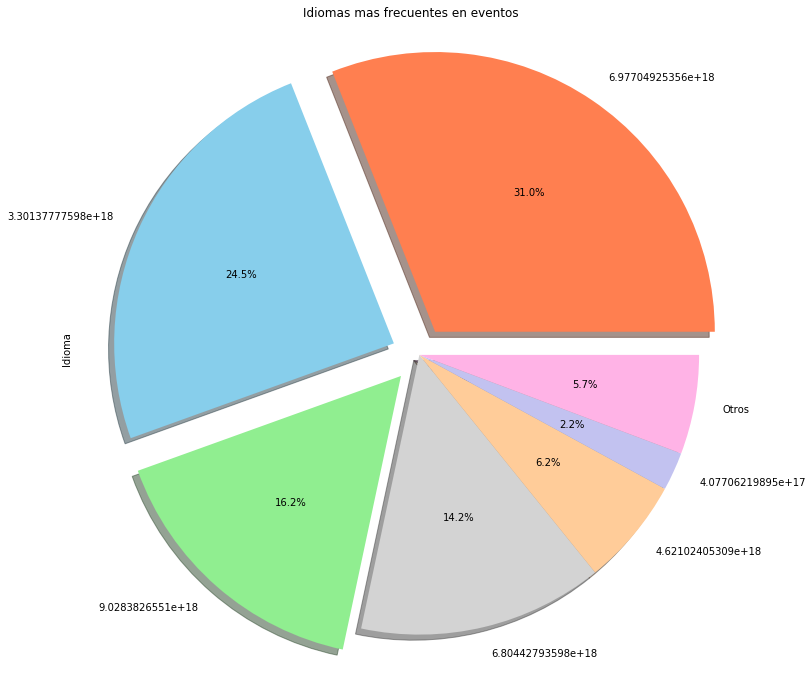

In [9]:
c=['coral','skyblue','lightgreen','lightgrey','#ffcc99','#c2c2f0','#ffb3e6']
explode_events = [0.1,0.1,0.1,0,0,0,0]
ax = top6_idiomas_events.plot.pie(label='Idioma', shadow = True, autopct='%1.1f%%', y='sum', explode = explode_events,
                           legend=False,title='Idiomas mas frecuentes en eventos', figsize=(12,12),colors=c)
ax.axis('equal')

Text(0,0.5,'Numero de eventos')

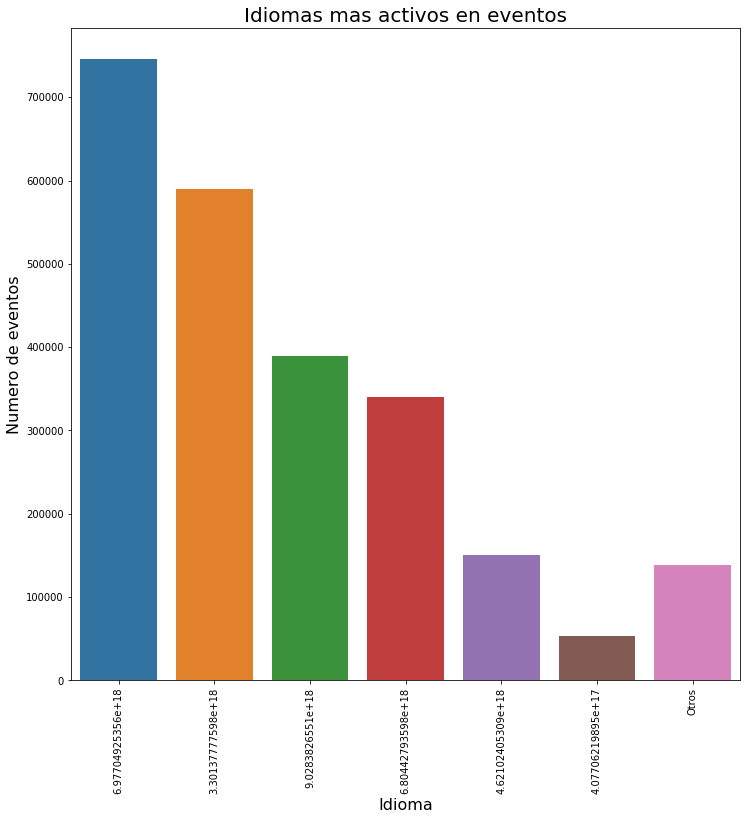

In [12]:
c=['#ff7f50','#87ceeb','#90ee90','#d3d3d3','#ffcc99','#c2c2f0','#ffb3e6']
#colores = sns.palplot(sns.color_palette(c))
plt.figure(figsize=(12, 12))
plt.xticks(rotation='vertical')

top6 = top6_idiomas_events.reset_index()
ax = sns.barplot(x="device_language", y="sum", data=top6)
ax.set_title('Idiomas mas activos en eventos', fontsize=20)
ax.set_xlabel('Idioma',fontsize=16)
ax.set_ylabel('Numero de eventos', fontsize=16)

(-1.1121884384429774,
 1.1800693494601588,
 -1.1104151886653504,
 1.2093977111975325)

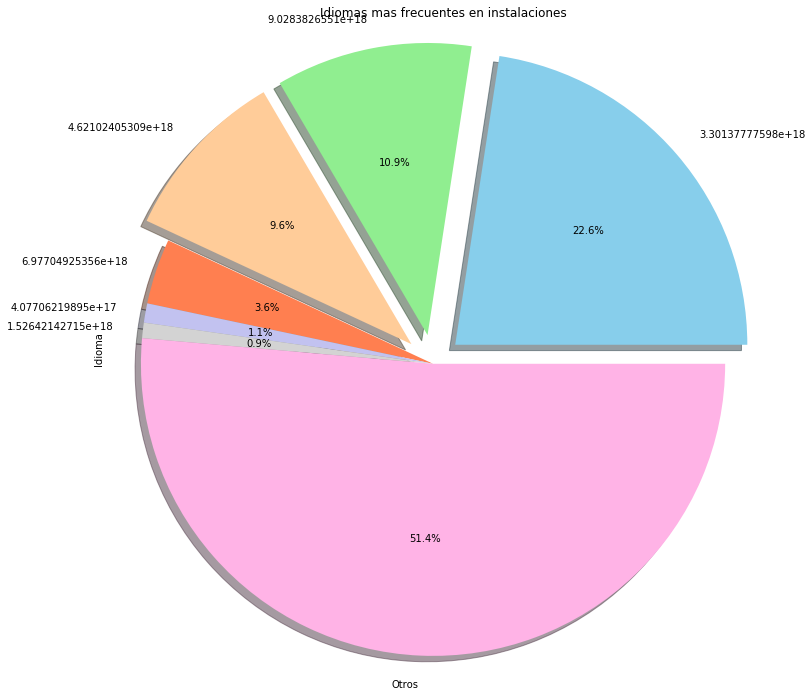

In [13]:
c = ['skyblue', 'lightgreen','#ffcc99','#ff7f50','#c2c2f0','lightgrey','#ffb3e6']
explode_installs = [0.1,0.1,0.1,0,0,0,0]
ax = top6_idiomas_installs.plot.pie(label='Idioma', shadow = True, autopct='%1.1f%%', y='sum', explode = explode_installs,
                           legend=False,title='Idiomas mas frecuentes en instalaciones', figsize=(12,12), colors=c)
ax.axis('equal')

Text(0,0.5,'Numero de instalaciones')

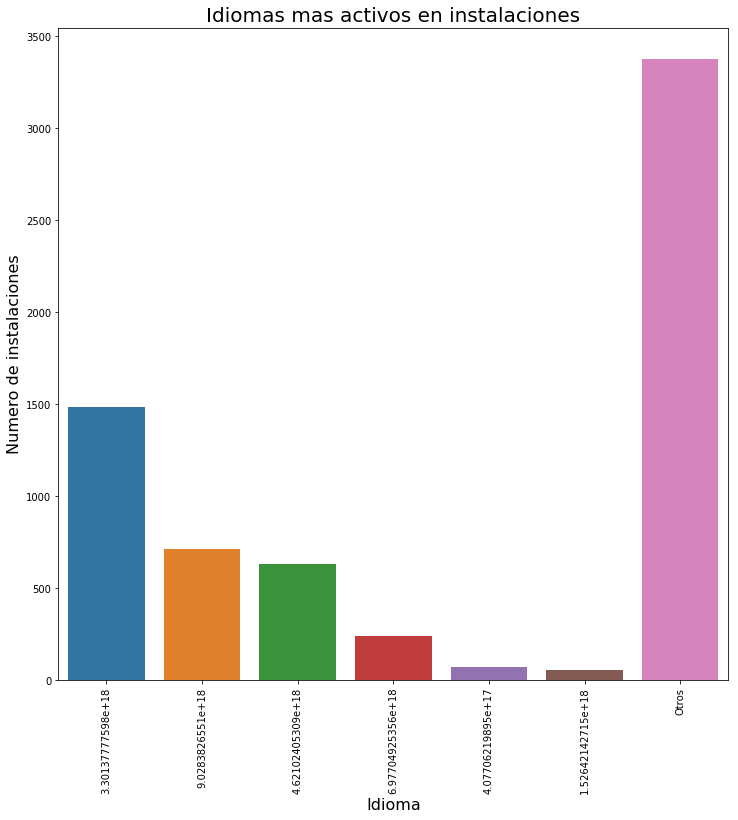

In [15]:
c=['#ff7f50','#87ceeb','#90ee90','#d3d3d3','#ffcc99','#c2c2f0','#ffb3e6']
#colores = sns.palplot(sns.color_palette(c))
plt.figure(figsize=(12, 12))
plt.xticks(rotation='vertical')
top6 = top6_idiomas_installs.reset_index()
ax = sns.barplot(x="device_language", y="sum", data=top6)
ax.set_title('Idiomas mas activos en instalaciones', fontsize=20)
ax.set_xlabel('Idioma',fontsize=16)
ax.set_ylabel('Numero de instalaciones', fontsize=16)

# 2: Análisis temporal en base al idioma del dispositivo
## 2.1: Análisis de los 6 idiomas más activos

In [16]:
top6_idiomas = events['device_language'].value_counts().head(6).keys()
events['date'] = pd.to_datetime(events['date'])
events['hora'] = events['date'].apply(lambda x: x.hour)

In [17]:
id1 = events.loc[events['device_language'] == top6_idiomas[0]]
id2 = events.loc[events['device_language'] == top6_idiomas[1]]
id3 = events.loc[events['device_language'] == top6_idiomas[2]]
id4 = events.loc[events['device_language'] == top6_idiomas[3]]
id5 = events.loc[events['device_language'] == top6_idiomas[4]]
id6 = events.loc[events['device_language'] == top6_idiomas[5]]

id1 = id1.groupby(['hora']).agg({'sum':'sum'})
id1 = id1.reset_index()
id2 = id2.groupby(['hora']).agg({'sum':'sum'})
id2 = id2.reset_index()
id3 = id3.groupby(['hora']).agg({'sum':'sum'})
id3 = id3.reset_index()
id4 = id4.groupby(['hora']).agg({'sum':'sum'})
id4 = id4.reset_index()
id5 = id5.groupby(['hora']).agg({'sum':'sum'})
id5 = id5.reset_index()
id6 = id6.groupby(['hora']).agg({'sum':'sum'})
id6 = id6.reset_index()

Text(0,0.5,'Eventos')

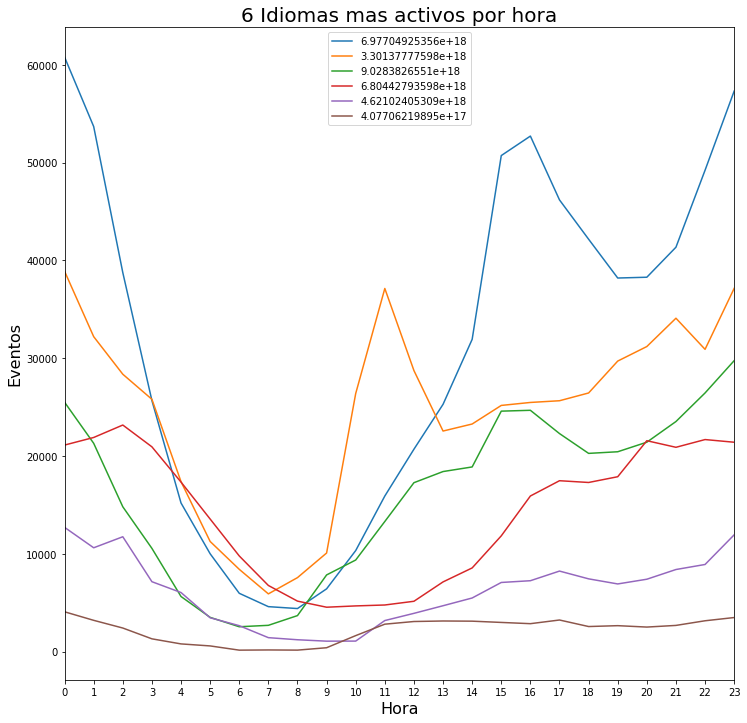

In [18]:
ax = id1.plot(xticks=np.arange(24), figsize=(12,12),y='sum',label=top6_idiomas[0])
id2.plot(ax=ax,y='sum',label=top6_idiomas[1])
id3.plot(ax=ax,y='sum',label=top6_idiomas[2])
id4.plot(ax=ax,y='sum',label=top6_idiomas[3])
id5.plot(ax=ax,y='sum',label=top6_idiomas[4])
id6.plot(ax=ax,y='sum',label=top6_idiomas[5])

ax.set_title('6 Idiomas mas activos por hora',fontsize=20)
ax.set_xlabel('Hora',fontsize=16)
ax.set_ylabel('Eventos',fontsize=16)

## 2.2: Análisis de los 6 idiomas con más instalaciones

In [19]:
top6_idiomas = installs['device_language'].value_counts().head(6).keys()
installs['created'] = pd.to_datetime(installs['created'])
installs['hora'] = installs['created'].apply(lambda x: x.hour)

In [20]:
id1 = installs.loc[installs['device_language'] == top6_idiomas[0]]
id2 = installs.loc[installs['device_language'] == top6_idiomas[1]]
id3 = installs.loc[installs['device_language'] == top6_idiomas[2]]
id4 = installs.loc[installs['device_language'] == top6_idiomas[3]]
id5 = installs.loc[installs['device_language'] == top6_idiomas[4]]
id6 = installs.loc[installs['device_language'] == top6_idiomas[5]]

id1 = id1.groupby(['hora']).agg({'sum':'sum'})
id1 = id1.reset_index()
id2 = id2.groupby(['hora']).agg({'sum':'sum'})
id2 = id2.reset_index()
id3 = id3.groupby(['hora']).agg({'sum':'sum'})
id3 = id3.reset_index()
id4 = id4.groupby(['hora']).agg({'sum':'sum'})
id4 = id4.reset_index()
id5 = id5.groupby(['hora']).agg({'sum':'sum'})
id5 = id5.reset_index()
id6 = id6.groupby(['hora']).agg({'sum':'sum'})
id6 = id6.reset_index()

Text(0,0.5,'Instalaciones')

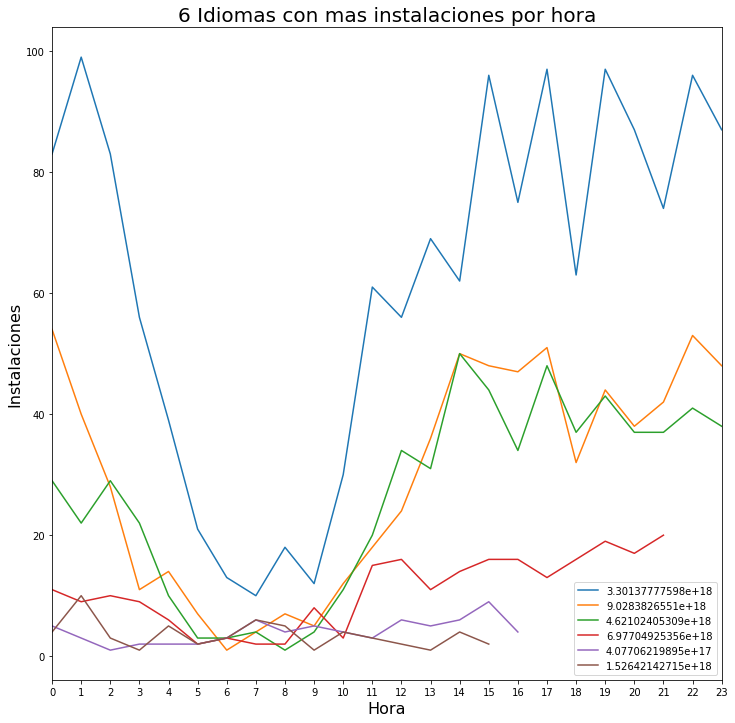

In [21]:
ax = id1.plot(xticks=np.arange(24), figsize=(12,12),y='sum',label=top6_idiomas[0])
id2.plot(ax=ax,y='sum',label=top6_idiomas[1])
id3.plot(ax=ax,y='sum',label=top6_idiomas[2])
id4.plot(ax=ax,y='sum',label=top6_idiomas[3])
id5.plot(ax=ax,y='sum',label=top6_idiomas[4])
id6.plot(ax=ax,y='sum',label=top6_idiomas[5])

ax.set_title('6 Idiomas con mas instalaciones por hora',fontsize=20)
ax.set_xlabel('Hora',fontsize=16)
ax.set_ylabel('Instalaciones',fontsize=16)